In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.cluster import DBSCAN
%matplotlib inline

In [65]:
df = pd.read_csv("stockmarket_forfinalexam.csv")
df = df.fillna(0)

In [66]:
df.head()

,date,month,year,comnam,cusip,prc,vol,ret,shrout,vwretd,bm,pe_inc,roa,analyst_recommendation
0,31-Jan-19,1,2019,A C C O BRANDS CORP,00081T10,8.83,146648,0.302360,102740,0.088295,0.795340,6.589552,0.102753,1
1,28-Feb-19,2,2019,A C C O BRANDS CORP,00081T10,9.30,115569,0.053228,102207,0.032724,1.386516,9.300000,0.098147,1
2,29-Mar-19,3,2019,A C C O BRANDS CORP,00081T10,8.56,101751,-0.073118,102078,0.012964,1.386516,8.560000,0.098147,0
3,30-Apr-19,4,2019,A C C O BRANDS CORP,00081T10,9.14,73444,0.067757,102621,0.037889,1.386516,9.140000,0.098147,1
4,31-May-19,5,2019,A C C O BRANDS CORP,00081T10,7.35,135042,-0.189278,102089,-0.061679,1.069640,8.076923,0.099000,0


In [67]:
cdf = df[["pe_inc", "roa", "ret", "analyst_recommendation"]]

In [68]:
cdf.head()


,pe_inc,roa,ret,analyst_recommendation
0,6.589552,0.102753,0.302360,1
1,9.300000,0.098147,0.053228,1
2,8.560000,0.098147,-0.073118,0
3,9.140000,0.098147,0.067757,1
4,8.076923,0.099000,-0.189278,0


In [69]:
scandf = df[['pe_inc', 'roa']]


In [70]:
dbscan = DBSCAN(eps=0.8, min_samples=8)

dbscan.fit(scandf)

DBSCAN(eps=0.8, min_samples=8)

In [71]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)

In [72]:
core_samples_mask

array([False, False, False, ..., False, False, False])

In [73]:
core_samples_mask[dbscan.core_sample_indices_] = True

In [74]:
labels = dbscan.labels_

In [75]:
num_samples_before = len(scandf)
num_samples_after = len(scandf[core_samples_mask])

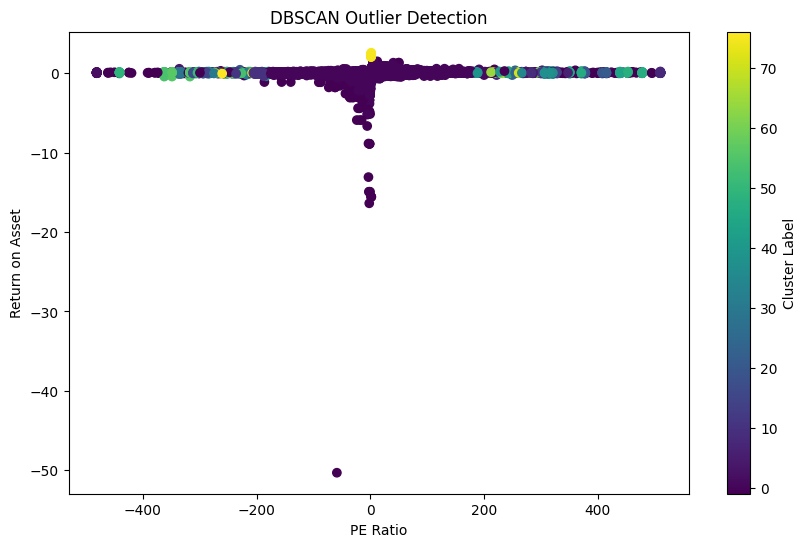

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(scandf['pe_inc'], scandf['roa'], c=labels, cmap='viridis')
plt.title('DBSCAN Outlier Detection')
plt.xlabel('PE Ratio')
plt.ylabel('Return on Asset')
plt.colorbar(label='Cluster Label')
plt.show()

In [77]:
print("Number of samples before removing outliers:", num_samples_before)
print("Number of samples after removing outliers:", num_samples_after)

Number of samples before removing outliers: 86275
Number of samples after removing outliers: 85675


In [78]:
df = pd.read_csv("stockmarket_forfinalexam.csv")
df.dropna(inplace=True)
df['prev_ret'] = df['ret'].shift(1)

In [79]:
df.head()

,date,month,year,comnam,cusip,prc,vol,ret,shrout,vwretd,bm,pe_inc,roa,analyst_recommendation,prev_ret
0,31-Jan-19,1,2019,A C C O BRANDS CORP,00081T10,8.83,146648,0.302360,102740,0.088295,0.795340,6.589552,0.102753,1,NaN
1,28-Feb-19,2,2019,A C C O BRANDS CORP,00081T10,9.30,115569,0.053228,102207,0.032724,1.386516,9.300000,0.098147,1,0.302360
2,29-Mar-19,3,2019,A C C O BRANDS CORP,00081T10,8.56,101751,-0.073118,102078,0.012964,1.386516,8.560000,0.098147,0,0.053228
3,30-Apr-19,4,2019,A C C O BRANDS CORP,00081T10,9.14,73444,0.067757,102621,0.037889,1.386516,9.140000,0.098147,1,-0.073118
4,31-May-19,5,2019,A C C O BRANDS CORP,00081T10,7.35,135042,-0.189278,102089,-0.061679,1.069640,8.076923,0.099000,0,0.067757


In [61]:
clean_df = df[core_samples_mask]

In [80]:
#clean_df.dropna(inplace=True)
clean_df = clean_df.fillna(0)
clean_df.head()


,date,month,year,comnam,cusip,prc,vol,ret,shrout,vwretd,bm,pe_inc,roa,analyst_recommendation,prev_ret
0,31-Jan-19,1,2019,A C C O BRANDS CORP,00081T10,8.83,146648,0.302360,102740,0.088295,0.795340,6.589552,0.102753,1,0.000000
1,28-Feb-19,2,2019,A C C O BRANDS CORP,00081T10,9.30,115569,0.053228,102207,0.032724,1.386516,9.300000,0.098147,1,0.302360
2,29-Mar-19,3,2019,A C C O BRANDS CORP,00081T10,8.56,101751,-0.073118,102078,0.012964,1.386516,8.560000,0.098147,0,0.053228
3,30-Apr-19,4,2019,A C C O BRANDS CORP,00081T10,9.14,73444,0.067757,102621,0.037889,1.386516,9.140000,0.098147,1,-0.073118
4,31-May-19,5,2019,A C C O BRANDS CORP,00081T10,7.35,135042,-0.189278,102089,-0.061679,1.069640,8.076923,0.099000,0,0.067757


In [81]:
X = clean_df[['pe_inc', 'roa', 'prev_ret']]
y = clean_df['analyst_recommendation']

In [92]:
X.head()

,pe_inc,roa,prev_ret
0,6.589552,0.102753,0.000000
1,9.300000,0.098147,0.302360
2,8.560000,0.098147,0.053228
3,9.140000,0.098147,-0.073118
4,8.076923,0.099000,0.067757


In [91]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: analyst_recommendation, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
linear_model = LogisticRegression()
linear_model.fit(X_train, y_train)
linear_preds = linear_model.predict(X_test)

In [84]:
from sklearn.neural_network import MLPClassifier
# use two neurons
nn_model = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000)
nn_model.fit(X_train, y_train)
nn_preds = nn_model.predict(X_test)

In [86]:
from sklearn.metrics import classification_report
print("Multivariate Linear Classification Report:")
print(classification_report(y_test, linear_preds))

print("\n3-layer Neural Network Classification Report:")
print(classification_report(y_test, nn_preds))

Multivariate Linear Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.04      0.08      9338
           1       0.56      0.97      0.71     11624

    accuracy                           0.56     20962
   macro avg       0.54      0.51      0.39     20962
weighted avg       0.54      0.56      0.43     20962


3-layer Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.26      0.35      9338
           1       0.58      0.83      0.68     11624

    accuracy                           0.58     20962
   macro avg       0.57      0.54      0.52     20962
weighted avg       0.57      0.58      0.54     20962

